In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/combined_data_final.csv')

In [83]:
data.head()

keyword                                           headline  \
0     doe  35 Years Later, the Remains Known as ‘Chimney ...   
1     doe  Man Convicted in Transgender Woman’s Killing i...   
2     doe  Agency for Protecting Children Traumatizes Fam...   
3     doe                 OK, Class, First We Shoot the Deer   
4     doe  Unsealed Documents Shed Light on Epstein’s Mis...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
2  A lawsuit says that investigators for the Admi...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   

                   pub_date section_name     type_of_material document_type  \
0  2024-05-16T17:36:44+0000         U.S.                 News       article   
1  2024-02-24T22:33:52+0000         U.S.                 News       article   
2  2024-02-20T13:43:06+0000         U.S.  Interactive Feature    multimedia   
3  2024-03-19T09:00:39+0000         Food                 News       article   
4  2024-01-04T00:13:40+0000     New York                 News       article   

  news_desk                                            snippet  \
0   Express  A skeleton found in the chimney of a Wisconsin...   
1   Express  Prosecutors said the man was upset that word a...   
2      U.S.  A lawsuit says that investigators for the Admi...   
3    Dining  A Missouri high school program teaches student...   
4     Metro  The court documents include unredacted names o...   

                                      lead_paragraph              source  \
0  In September 1989, the owners of the Good ‘n L...  The New York Times   
1  A South Carolina man was found guilty on Frida...  The New York Times   
2  A lawsuit says that investigators for the Admi...  The New York Times   
3  At Maysville High School in Maysville, Mo., po...  The New York Times   
4  Hundreds of pages of previously sealed court d...  The New York Times   

   word_count                                                uri  \
0         799  nyt://article/813cf173-c478-5704-bdc3-0f0a3f93...   
1         606  nyt://article/9056ac2a-b9e1-5555-afbb-a7a878f9...   
2           0  nyt://interactive/a787cff2-c425-502d-a2a6-480d...   
3         712  nyt://article/aded8653-9bd2-591a-a73d-d2b91e45...   
4        1119  nyt://article/7412750e-5b72-5d14-ad2b-5b0675e5...   

                                             web_url  \
0  https://www.nytimes.com/2024/05/16/us/skeleton...   
1  https://www.nytimes.com/2024/02/24/us/dime-doe...   
2  https://www.nytimes.com/interactive/2024/02/20...   
3  https://www.nytimes.com/2024/03/19/dining/miss...   
4  https://www.nytimes.com/2024/01/03/nyregion/je...   

                                     byline  \
0                          By Emily Schmall   
1                       By Rebecca Carballo   
2                                       NaN   
3        By Katie Currid and Mark Josephson   
4  By Matthew Goldstein and Benjamin Weiser   

                                            keywords  
0  Murders, Attempted Murders and Homicides, Fore...  
1  Murders, Attempted Murders and Homicides, Hate...  
2                                                NaN  
3  Local Food, Maysville (Mo), Education (Seconda...  
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...

In [84]:
data.shape

(17666, 16)

Checking for Duplicate Values

In [85]:
duplicates = data[data.duplicated(subset=['keyword', 'headline', 'pub_date'], keep=False)]

duplicate_count = duplicates.shape[0]

print(f"Number of duplicate rows based on 'keyword', 'headline' and 'pub_date': {duplicate_count}")
duplicates.head()

Number of duplicate rows based on 'keyword', 'headline' and 'pub_date': 1197


keyword                                           headline  \
503   kamala  Trump Is Rallying in New Jersey and Boasting o...   
504   kamala  Trump Is Rallying in New Jersey and Boasting o...   
793    house  Idaho 2nd Congressional District Primary Elect...   
794    house  Idaho 2nd Congressional District Primary Elect...   
3627  result          Indiana Governor Primary Election Results   

                                               abstract  \
503   And he continues to cross new lines with wild ...   
504   And he continues to cross new lines with wild ...   
793   Get live results and maps from the 2024 Idaho ...   
794   Get live results and maps from the 2024 Idaho ...   
3627  Get live results and maps from the 2024 Indian...   

                      pub_date section_name type_of_material document_type  \
503   2024-05-06T09:02:53+0000      Opinion             News       article   
504   2024-05-06T09:02:53+0000      Opinion             News       article   
793   2024-05-21T16:06:16+0000         U.S.              NaN    multimedia   
794   2024-05-21T16:06:16+0000         U.S.              NaN    multimedia   
3627  2024-05-07T16:08:10+0000         U.S.              NaN    multimedia   

     news_desk                                            snippet  \
503       OpEd  And he continues to cross new lines with wild ...   
504       OpEd  And he continues to cross new lines with wild ...   
793   Graphics  Get live results and maps from the 2024 Idaho ...   
794   Graphics  Get live results and maps from the 2024 Idaho ...   
3627  Graphics  Get live results and maps from the 2024 Indian...   

                                         lead_paragraph              source  \
503   Every Monday morning on The Point, we kick off...  The New York Times   
504   Every Monday morning on The Point, we kick off...  The New York Times   
793   Get live results and maps from the 2024 Idaho ...  The New York Times   
794   Get live results and maps from the 2024 Idaho ...  The New York Times   
3627  Get live results and maps from the 2024 Indian...  The New York Times   

      word_count                                                uri  \
503          408  nyt://article/97c15d10-41fe-5cb6-b9c6-9bc00fc8...   
504          408  nyt://article/97c15d10-41fe-5cb6-b9c6-9bc00fc8...   
793            0  nyt://interactive/58b632aa-1b64-55b4-b04f-aef4...   
794            0  nyt://interactive/58b632aa-1b64-55b4-b04f-aef4...   
3627           0  nyt://interactive/b7f31339-3f82-5a10-b5de-f5e9...   

                                                web_url               byline  \
503   https://www.nytimes.com/2024/05/06/opinion/tru...  By Katherine Miller   
504   https://www.nytimes.com/2024/05/06/opinion/tru...  By Katherine Miller   
793   https://www.nytimes.com/interactive/2024/05/21...                  NaN   
794   https://www.nytimes.com/interactive/2024/05/21...                  NaN   
3627  https://www.nytimes.com/interactive/2024/05/07...                  NaN   

                                               keywords  
503                                                 NaN  
504                                                 NaN  
793   internal-paywall-exempt, Elections, Primaries ...  
794   internal-paywall-exempt, Elections, Primaries ...  
3627  internal-paywall-exempt, Elections, Primaries ...

Removing Duplicate values

In [86]:
data_unique = data.drop_duplicates(subset=['keyword', 'headline', 'pub_date'], keep='first')

print(f"Number of rows after removing duplicates: {data_unique.shape[0]}")
data_unique.head()

Number of rows after removing duplicates: 17066


keyword                                           headline  \
0     doe  35 Years Later, the Remains Known as ‘Chimney ...   
1     doe  Man Convicted in Transgender Woman’s Killing i...   
2     doe  Agency for Protecting Children Traumatizes Fam...   
3     doe                 OK, Class, First We Shoot the Deer   
4     doe  Unsealed Documents Shed Light on Epstein’s Mis...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
2  A lawsuit says that investigators for the Admi...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   

                   pub_date section_name     type_of_material document_type  \
0  2024-05-16T17:36:44+0000         U.S.                 News       article   
1  2024-02-24T22:33:52+0000         U.S.                 News       article   
2  2024-02-20T13:43:06+0000         U.S.  Interactive Feature    multimedia   
3  2024-03-19T09:00:39+0000         Food                 News       article   
4  2024-01-04T00:13:40+0000     New York                 News       article   

  news_desk                                            snippet  \
0   Express  A skeleton found in the chimney of a Wisconsin...   
1   Express  Prosecutors said the man was upset that word a...   
2      U.S.  A lawsuit says that investigators for the Admi...   
3    Dining  A Missouri high school program teaches student...   
4     Metro  The court documents include unredacted names o...   

                                      lead_paragraph              source  \
0  In September 1989, the owners of the Good ‘n L...  The New York Times   
1  A South Carolina man was found guilty on Frida...  The New York Times   
2  A lawsuit says that investigators for the Admi...  The New York Times   
3  At Maysville High School in Maysville, Mo., po...  The New York Times   
4  Hundreds of pages of previously sealed court d...  The New York Times   

   word_count                                                uri  \
0         799  nyt://article/813cf173-c478-5704-bdc3-0f0a3f93...   
1         606  nyt://article/9056ac2a-b9e1-5555-afbb-a7a878f9...   
2           0  nyt://interactive/a787cff2-c425-502d-a2a6-480d...   
3         712  nyt://article/aded8653-9bd2-591a-a73d-d2b91e45...   
4        1119  nyt://article/7412750e-5b72-5d14-ad2b-5b0675e5...   

                                             web_url  \
0  https://www.nytimes.com/2024/05/16/us/skeleton...   
1  https://www.nytimes.com/2024/02/24/us/dime-doe...   
2  https://www.nytimes.com/interactive/2024/02/20...   
3  https://www.nytimes.com/2024/03/19/dining/miss...   
4  https://www.nytimes.com/2024/01/03/nyregion/je...   

                                     byline  \
0                          By Emily Schmall   
1                       By Rebecca Carballo   
2                                       NaN   
3        By Katie Currid and Mark Josephson   
4  By Matthew Goldstein and Benjamin Weiser   

                                            keywords  
0  Murders, Attempted Murders and Homicides, Fore...  
1  Murders, Attempted Murders and Homicides, Hate...  
2                                                NaN  
3  Local Food, Maysville (Mo), Education (Seconda...  
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...

In [87]:
data_unique.shape

(17066, 16)

Checking Null Values

In [88]:
data_unique.isnull().sum().sum()

2860

In [89]:
missing_value = data_unique.isnull().sum().sort_values(ascending=False)
missing_value

byline              1263
type_of_material     612
news_desk            479
keywords             325
lead_paragraph        58
snippet               54
section_name          29
abstract              20
source                20
keyword                0
headline               0
pub_date               0
document_type          0
word_count             0
uri                    0
web_url                0
dtype: int64

In [90]:
missing_percentage = (data_unique.isnull().sum() / len(data_unique)) * 100
print("Percentage of missing values in each column:")
missing_percentage.sort_values(ascending=False)

Percentage of missing values in each column:


byline              7.400680
type_of_material    3.586078
news_desk           2.806750
keywords            1.904371
lead_paragraph      0.339857
snippet             0.316419
section_name        0.169929
abstract            0.117192
source              0.117192
keyword             0.000000
headline            0.000000
pub_date            0.000000
document_type       0.000000
word_count          0.000000
uri                 0.000000
web_url             0.000000
dtype: float64

Dropping columns

In [91]:
relevant_column = data_unique.drop(columns=["byline", "type_of_material", "news_desk", "keyword", "section_name", "source", "document_type","uri","web_url"])
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
2  Agency for Protecting Children Traumatizes Fam...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
2  A lawsuit says that investigators for the Admi...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
2  2024-02-20T13:43:06+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
2  A lawsuit says that investigators for the Admi...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
2  A lawsuit says that investigators for the Admi...           0   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   

                                            keywords  
0  Murders, Attempted Murders and Homicides, Fore...  
1  Murders, Attempted Murders and Homicides, Hate...  
2                                                NaN  
3  Local Food, Maysville (Mo), Education (Seconda...  
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...

In [92]:
relevant_column = relevant_column.dropna(subset=["abstract", "snippet", "lead_paragraph", "keywords"])
relevant_column.isnull().sum().sort_values(ascending=False)

headline          0
abstract          0
pub_date          0
snippet           0
lead_paragraph    0
word_count        0
keywords          0
dtype: int64

In [93]:
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   
5  2024-05-03T16:17:01+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   
5  Liberia’s president has signed an executive or...         794   

                                            keywords  
0  Murders, Attempted Murders and Homicides, Fore...  
1  Murders, Attempted Murders and Homicides, Hate...  
3  Local Food, Maysville (Mo), Education (Seconda...  
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...  
5  War Crimes, Genocide and Crimes Against Humani...

In [94]:
relevant_column['combined_text'] = relevant_column['headline'] + " " + relevant_column['abstract'] + " " + relevant_column['snippet'] + " " + relevant_column['lead_paragraph']

relevant_column.to_csv("combined_text.csv", index=False)
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   
5  2024-05-03T16:17:01+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   
5  Liberia’s president has signed an executive or...         794   

                                            keywords  \
0  Murders, Attempted Murders and Homicides, Fore...   
1  Murders, Attempted Murders and Homicides, Hate...   
3  Local Food, Maysville (Mo), Education (Seconda...   
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...   
5  War Crimes, Genocide and Crimes Against Humani...   

                                       combined_text  
0  35 Years Later, the Remains Known as ‘Chimney ...  
1  Man Convicted in Transgender Woman’s Killing i...  
3  OK, Class, First We Shoot the Deer A Missouri ...  
4  Unsealed Documents Shed Light on Epstein’s Mis...  
5  Liberia Moves to Create War Crimes Court, Deca...

In [95]:
print(relevant_column['keywords'].nunique())

8577


Analysis Based on Keywords

In [96]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

relevant_column['processed_text'] = relevant_column['combined_text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TF-IDF

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd

# Custom stopwords
custom_stopwords = {
    "say", "make", "take", "go", "come", "get", "give", "like", "do",
    "would", "should", "could", "will", "can", "think", "want",
    "people", "day", "new", "time", "u", "i", "he", "she", "you",
    "what", "others", "they", "that"
}

extended_stopwords = list(ENGLISH_STOP_WORDS.union(custom_stopwords))

tfidf_vectorizer = TfidfVectorizer(stop_words=extended_stopwords)

tfidf_matrix = tfidf_vectorizer.fit_transform(relevant_column['processed_text'])

all_keywords = tfidf_vectorizer.get_feature_names_out()

word_counts = (tfidf_matrix > 0).sum(axis=0).A1

tfidf_keyword_counts = pd.DataFrame({
    'Keyword': all_keywords,
    'TF_IDF_Frequency': word_counts
}).sort_values(by='TF_IDF_Frequency', ascending=False)

def extract_tfidf_keywords(row_text):

    return [word for word in row_text.split() if word in all_keywords]

relevant_column['tfidf_keywords'] = relevant_column['processed_text'].apply(extract_tfidf_keywords)

tfidf_keyword_dict = tfidf_keyword_counts.set_index('Keyword')['TF_IDF_Frequency'].to_dict()

def calculate_keyword_frequencies(row_keywords):

    if isinstance(row_keywords, list):
        return {word: tfidf_keyword_dict[word] for word in row_keywords if word in tfidf_keyword_dict}
    return {}

relevant_column['TF_IDF_Keyword_Frequencies'] = relevant_column['tfidf_keywords'].apply(calculate_keyword_frequencies)

data.to_csv("data_with_tfidf_keyword_frequencies.csv", index=False)
print("Data with TF-IDF keyword frequencies saved to 'data_with_tfidf_keyword_frequencies.csv'")

print("Top 10 Keywords Based on TF-IDF Frequency:")
print(tfidf_keyword_counts.head(10))


Data with TF-IDF keyword frequencies saved to 'data_with_tfidf_keyword_frequencies.csv'
Top 10 Keywords Based on TF-IDF Frequency:
            Keyword  TF_IDF_Frequency
23231         trump              6467
17288     president              5622
6506         donald              5282
7000       election              4827
21403         state              3306
18725    republican              2592
2142          biden              2414
25156          year              2404
17291  presidential              2396
24351         voter              2290


spacy

In [ ]:
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Custom stopwords
custom_stopwords = {
    "say", "make", "take", "go", "come", "get", "give", "like", "do",
    "would", "should", "could", "will", "can", "think", "want",
    "people", "day", "new", "time", "u", "i", "he", "she", "you",
    "what", "others", "they", "that"
}

for word in custom_stopwords:
    nlp.Defaults.stop_words.add(word)
    nlp.vocab[word].is_stop = True

def extract_spacy_keywords(text):
    doc = nlp(text)
    keywords = [
        chunk.text.lower().strip()
        for chunk in doc.noun_chunks
        if chunk.text.lower().strip() not in nlp.Defaults.stop_words
    ]
    return keywords

relevant_column['spacy_keywords'] = relevant_column['processed_text'].apply(extract_spacy_keywords)

spacy_keywords_flat = [
    keyword for keywords_list in relevant_column['spacy_keywords'].dropna() for keyword in keywords_list
]

spacy_keyword_counts = pd.Series(spacy_keywords_flat).value_counts().reset_index()
spacy_keyword_counts.columns = ['Keyword', 'Spacy_Frequency']

spacy_keyword_dict = spacy_keyword_counts.set_index('Keyword')['Spacy_Frequency'].to_dict()

def calculate_spacy_keyword_frequencies(row_keywords):

    keywords = [word for word in row_keywords if word in spacy_keyword_dict]
    keyword_frequencies = {word: spacy_keyword_dict[word] for word in keywords}
    return keyword_frequencies

relevant_column['Spacy_Keyword_Frequencies'] = relevant_column['spacy_keywords'].apply(calculate_spacy_keyword_frequencies)

relevant_column.to_csv("data_with_spacy_keyword_frequencies.csv", index=False)
print("Data with SpaCy keyword frequencies saved to 'data_with_spacy_keyword_frequencies.csv'")

print("Top 10 Keywords (SpaCy):")
print(spacy_keyword_counts.head(10))


Data with SpaCy keyword frequencies saved to 'data_with_spacy_keyword_frequencies.csv'
Top 10 Keywords (SpaCy):
                           Keyword  Spacy_Frequency
0                 former president              847
1                            trump              629
2  former president donald j trump              614
3                    kamala harris              530
4                            biden              424
5                           israel              375
6                     donald trump              354
7                          country              352
8                  president biden              339
9                           harris              330


In [46]:
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   
5  2024-05-03T16:17:01+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   
5  Liberia’s president has signed an executive or...         794   

                                            keywords  \
0  Murders, Attempted Murders and Homicides, Fore...   
1  Murders, Attempted Murders and Homicides, Hate...   
3  Local Food, Maysville (Mo), Education (Seconda...   
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...   
5  War Crimes, Genocide and Crimes Against Humani...   

                                       combined_text  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3  OK, Class, First We Shoot the Deer A Missouri ...   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                      processed_text  
0  year later remains known chimney doe name face...  
1  man convicted transgender woman killing first ...  
3  ok class first shoot deer missouri high school...  
4  unsealed document shed light epstein misdeed l...  
5  liberia move create war crime court decade civ...

Comining the text

In [ ]:
# Rebuild Combined_Keywords column
def combine_keywords_spacy_tf(row):
    spacy = row['spacy_keywords'] if isinstance(row['spacy_keywords'], list) else []
    tfidf = row['tfidf_keywords'] if isinstance(row['tfidf_keywords'], list) else []
    return list(set(spacy + tfidf))

relevant_column['Combined_Keywords_spacy_tf'] = relevant_column.apply(combine_keywords_spacy_tf, axis=1)


In [47]:
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   
5  2024-05-03T16:17:01+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   
5  Liberia’s president has signed an executive or...         794   

                                            keywords  \
0  Murders, Attempted Murders and Homicides, Fore...   
1  Murders, Attempted Murders and Homicides, Hate...   
3  Local Food, Maysville (Mo), Education (Seconda...   
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...   
5  War Crimes, Genocide and Crimes Against Humani...   

                                       combined_text  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3  OK, Class, First We Shoot the Deer A Missouri ...   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                      processed_text  
0  year later remains known chimney doe name face...  
1  man convicted transgender woman killing first ...  
3  ok class first shoot deer missouri high school...  
4  unsealed document shed light epstein misdeed l...  
5  liberia move create war crime court decade civ...

In [ ]:

max_spacy_freq = relevant_column['Spacy_Keyword_Frequencies'].apply(lambda x: max(x.values()) if isinstance(x, dict) else 0).max()


relevant_column['Normalized_Spacy_Frequency'] = relevant_column['Spacy_Keyword_Frequencies'].apply(
    lambda x: {k: v/max_spacy_freq for k, v in x.items()} if isinstance(x, dict) else {}
)

max_tfidf_freq = relevant_column['TF_IDF_Keyword_Frequencies'].apply(lambda x: max(x.values()) if isinstance(x, dict) else 0).max()

relevant_column['Normalized_TF_IDF_Frequency'] = relevant_column['TF_IDF_Keyword_Frequencies'].apply(
    lambda x: {k: v/max_tfidf_freq for k, v in x.items()} if isinstance(x, dict) else {}
)

In [ ]:
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   
5  2024-05-03T16:17:01+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   
5  Liberia’s president has signed an executive or...         794   

                                            keywords  \
0  Murders, Attempted Murders and Homicides, Fore...   
1  Murders, Attempted Murders and Homicides, Hate...   
3  Local Food, Maysville (Mo), Education (Seconda...   
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...   
5  War Crimes, Genocide and Crimes Against Humani...   

                                       combined_text  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3  OK, Class, First We Shoot the Deer A Missouri ...   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                      processed_text  \
0  year later remains known chimney doe name face...   
1  man convicted transgender woman killing first ...   
3  ok class first shoot deer missouri high school...   
4  unsealed document shed light epstein misdeed l...   
5  liberia move create war crime court decade civ...   

                                      tfidf_keywords  \
0  [year, later, remains, known, chimney, doe, fa...   
1  [man, convicted, transgender, woman, killing, ...   
3  [ok, class, shoot, deer, missouri, high, schoo...   
4  [unsealed, document, shed, light, epstein, mis...   
5  [liberia, create, war, crime, court, decade, c...   

                          TF_IDF_Keyword_Frequencies  \
0  {'year': 2404, 'later': 182, 'remains': 142, '...   
1  {'man': 355, 'convicted': 281, 'transgender': ...   
3  {'ok': 31, 'class': 96, 'shoot': 26, 'deer': 4...   
4  {'unsealed': 9, 'document': 96, 'shed': 38, 'l...   
5  {'liberia': 3, 'create': 55, 'war': 780, 'crim...   

                                      spacy_keywords  \
0  [known chimney doe name face skeleton, chimney...   
1  [man, transgender woman, first federal trial k...   
3  [class first shoot deer missouri high school p...   
4  [unsealed document shed, light, misdeed, littl...   
5  [liberia move, war crime court decade, civil w...   

                           Spacy_Keyword_Frequencies  \
0  {'known chimney doe name face skeleton': 1, 'c...   
1  {'man': 74, 'transgender woman': 2, 'first fed...   
3  {'class first shoot deer missouri high school ...   
4  {'unsealed document shed': 2, 'light': 3, 'mis...   
5  {'liberia move': 1, 'war crime court decade': ...   

                          Combined_Keywords_spacy_tf  \
0  [good n loud music 

In [ ]:
# Define weights for Spacy and TF-IDF frequencies
spacy_weight = 0.7
tfidf_weight = 0.3

def combine_keywords(row):

    spacy_freq = row['Normalized_Spacy_Frequency']
    tfidf_freq = row['Normalized_TF_IDF_Frequency']


    combined_keywords_s_t = {}


    if isinstance(spacy_freq, dict):
        for keyword, freq in spacy_freq.items():
            combined_keywords_s_t[keyword] = combined_keywords_s_t.get(keyword, 0) + (freq * spacy_weight)

    if isinstance(tfidf_freq, dict):
        for keyword, freq in tfidf_freq.items():
            combined_keywords_s_t[keyword] = combined_keywords_s_t.get(keyword, 0) + (freq * tfidf_weight)

    sorted_keywords = dict(sorted(combined_keywords_s_t.items(), key=lambda x: x[1], reverse=True))

    return sorted_keywords

relevant_column['Combined_Weighted_Keywords'] = relevant_column.apply(combine_keywords, axis=1)

In [ ]:
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   
5  2024-05-03T16:17:01+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   
5  Liberia’s president has signed an executive or...         794   

                                            keywords  \
0  Murders, Attempted Murders and Homicides, Fore...   
1  Murders, Attempted Murders and Homicides, Hate...   
3  Local Food, Maysville (Mo), Education (Seconda...   
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...   
5  War Crimes, Genocide and Crimes Against Humani...   

                                       combined_text  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3  OK, Class, First We Shoot the Deer A Missouri ...   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                      processed_text  \
0  year later remains known chimney doe name face...   
1  man convicted transgender woman killing first ...   
3  ok class first shoot deer missouri high school...   
4  unsealed document shed light epstein misdeed l...   
5  liberia move create war crime court decade civ...   

                                      tfidf_keywords  \
0  [year, later, remains, known, chimney, doe, fa...   
1  [man, convicted, transgender, woman, killing, ...   
3  [ok, class, shoot, deer, missouri, high, schoo...   
4  [unsealed, document, shed, light, epstein, mis...   
5  [liberia, create, war, crime, court, decade, c...   

                          TF_IDF_Keyword_Frequencies  \
0  {'year': 2404, 'later': 182, 'remains': 142, '...   
1  {'man': 355, 'convicted': 281, 'transgender': ...   
3  {'ok': 31, 'class': 96, 'shoot': 26, 'deer': 4...   
4  {'unsealed': 9, 'document': 96, 'shed': 38, 'l...   
5  {'liberia': 3, 'create': 55, 'war': 780, 'crim...   

                                      spacy_keywords  \
0  [known chimney doe name face skeleton, chimney...   
1  [man, transgender woman, first federal trial k...   
3  [class first shoot deer missouri high school p...   
4  [unsealed document shed, light, misdeed, littl...   
5  [liberia move, war crime court decade, civil w...   

                           Spacy_Keyword_Frequencies  \
0  {'known chimney doe name face skeleton': 1, 'c...   
1  {'man': 74, 'transgender woman': 2, 'first fed...   
3  {'class first shoot deer missouri high school ...   
4  {'unsealed document shed': 2, 'light': 3, 'mis...   
5  {'liberia move': 1, 'war crime court decade': ...   

                          Combined_Keywords_spacy_tf  \
0  [good n loud music 

In [ ]:
def get_top_keywords_with_average_weight(combined_keywords, n=10):


  if not isinstance(combined_keywords, dict):
    return []


  top_keywords = sorted(combined_keywords.items(), key=lambda x: x[1], reverse=True)[:n]


all_keywords = {}
for keywords in relevant_column['Combined_Weighted_Keywords']:
    if isinstance(keywords, dict):
        for keyword, weight in keywords.items():
            all_keywords[keyword] = max(all_keywords.get(keyword, 0), weight)

top_overall = sorted(all_keywords.items(), key=lambda x: x[1], reverse=True)[:10]

top_key = pd.DataFrame(top_overall, columns=['Keyword', 'Weight'])

# top_key.to_csv("top_keywords.csv", index=False)

print("Top 10 Keywords Across Entire Dataset:")
for keyword, weight in top_overall:
    print(f"{keyword}: {weight:.4f}")



Top 10 Keywords Across Entire Dataset:
trump: 0.8198
former president: 0.7000
former president donald j trump: 0.5074
president: 0.5038
biden: 0.4624
election: 0.4545
kamala harris: 0.4380
harris: 0.3765
republican: 0.3574
country: 0.3535


In [ ]:

data_key= [(k, v) for k, v in all_keywords.items()]


df = pd.DataFrame(data_key, columns=['Keywords', 'Weight'])

df = df.sort_values(by='Weight', ascending=False)

df.to_csv('all_keywords.csv', index=False)


In [ ]:
from textwrap import wrap

spacy_tf_df = top_key[['Keyword', 'Weight']].copy()

spacy_tf_df['Keyword'] = spacy_tf_df['Keyword'].fillna('Unknown').astype(str)

spacy_tf_df['Wrapped_Keyword'] = ['\n'.join(wrap(label, width=12)) for label in spacy_tf_df['Keyword']]

spacy_tf_df.head()


Keyword    Weight  \
0                            trump  0.819835   
1                 former president  0.700000   
2  former president donald j trump  0.507438   
3                        president  0.503776   
4                            biden  0.462397   

                      Wrapped_Keyword  
0                               trump  
1                   former\npresident  
2  former\npresident\ndonald j\ntrump  
3                           president  
4                               biden

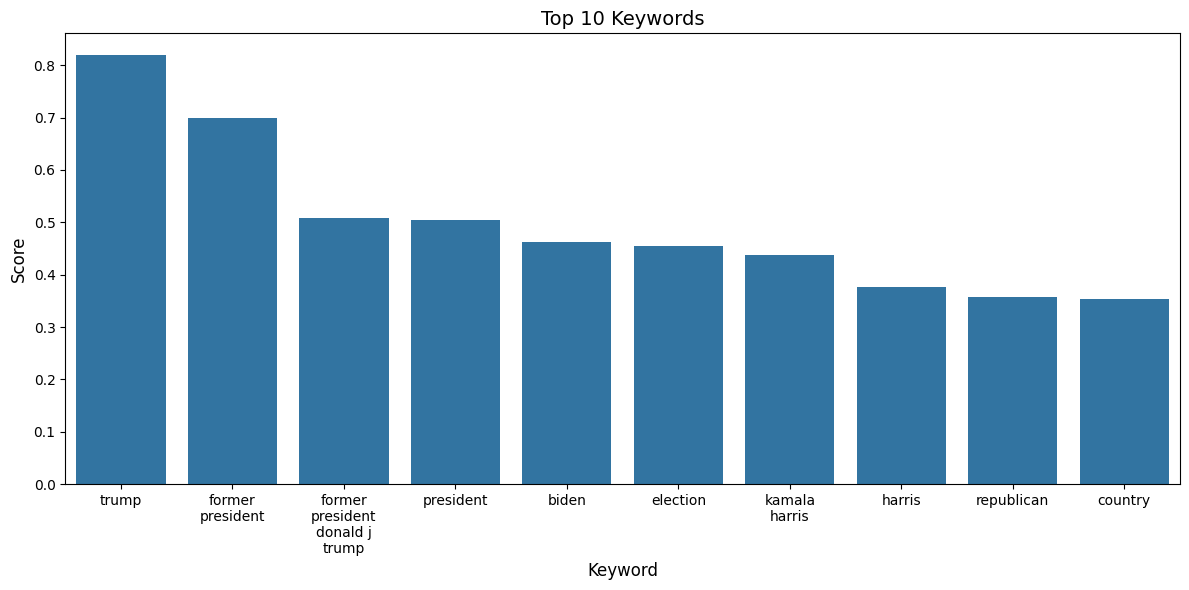

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Wrapped_Keyword', y='Weight', data=spacy_tf_df.head(10))

plt.xticks(rotation=0, fontsize=10, ha='center')
plt.title('Top 10 Keywords', fontsize=14)
plt.xlabel('Keyword', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.tight_layout()

plt.show()

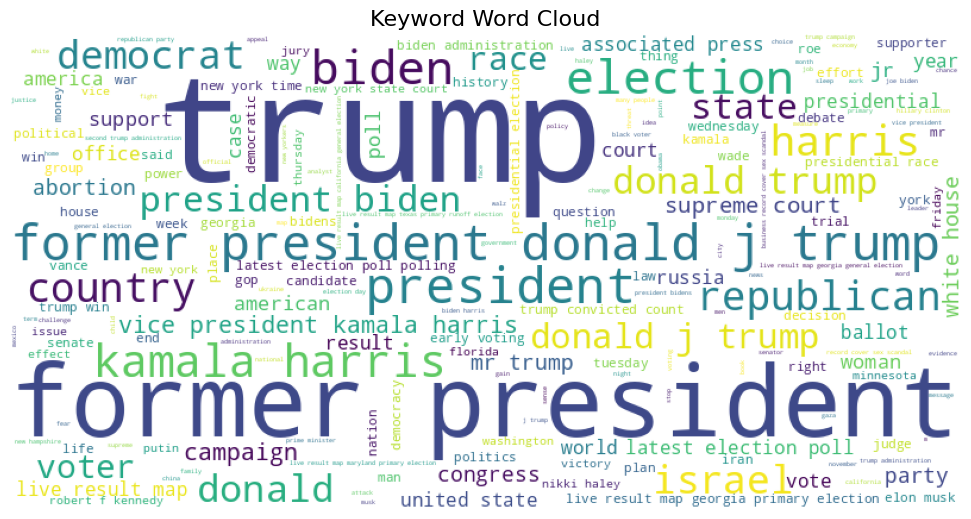

In [ ]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_keywords)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.title("Keyword Word Cloud", fontsize=16)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
relevant_column.head()

headline  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3                 OK, Class, First We Shoot the Deer   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                   pub_date  \
0  2024-05-16T17:36:44+0000   
1  2024-02-24T22:33:52+0000   
3  2024-03-19T09:00:39+0000   
4  2024-01-04T00:13:40+0000   
5  2024-05-03T16:17:01+0000   

                                             snippet  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   
5  Until now, key players had blocked the establi...   

                                      lead_paragraph  word_count  \
0  In September 1989, the owners of the Good ‘n L...         799   
1  A South Carolina man was found guilty on Frida...         606   
3  At Maysville High School in Maysville, Mo., po...         712   
4  Hundreds of pages of previously sealed court d...        1119   
5  Liberia’s president has signed an executive or...         794   

                                            keywords  \
0  Murders, Attempted Murders and Homicides, Fore...   
1  Murders, Attempted Murders and Homicides, Hate...   
3  Local Food, Maysville (Mo), Education (Seconda...   
4  Epstein, Jeffrey E (1953- ), Sex Crimes, Human...   
5  War Crimes, Genocide and Crimes Against Humani...   

                                       combined_text  \
0  35 Years Later, the Remains Known as ‘Chimney ...   
1  Man Convicted in Transgender Woman’s Killing i...   
3  OK, Class, First We Shoot the Deer A Missouri ...   
4  Unsealed Documents Shed Light on Epstein’s Mis...   
5  Liberia Moves to Create War Crimes Court, Deca...   

                                      processed_text  \
0  year later remains known chimney doe name face...   
1  man convicted transgender woman killing first ...   
3  ok class first shoot deer missouri high school...   
4  unsealed document shed light epstein misdeed l...   
5  liberia move create war crime court decade civ...   

                                      tfidf_keywords  \
0  [year, later, remains, known, chimney, doe, fa...   
1  [man, convicted, transgender, woman, killing, ...   
3  [ok, class, shoot, deer, missouri, high, schoo...   
4  [unsealed, document, shed, light, epstein, mis...   
5  [liberia, create, war, crime, court, decade, c...   

                          TF_IDF_Keyword_Frequencies  \
0  {'year': 2404, 'later': 182, 'remains': 142, '...   
1  {'man': 355, 'convicted': 281, 'transgender': ...   
3  {'ok': 31, 'class': 96, 'shoot': 26, 'deer': 4...   
4  {'unsealed': 9, 'document': 96, 'shed': 38, 'l...   
5  {'liberia': 3, 'create': 55, 'war': 780, 'crim...   

                                      spacy_keywords  \
0  [known chimney doe name face skeleton, chimney...   
1  [man, transgender woman, first federal trial k...   
3  [class first shoot deer missouri high school p...   
4  [unsealed document shed, light, misdeed, littl...   
5  [liberia move, war crime court decade, civil w...   

                           Spacy_Keyword_Frequencies  \
0  {'known chimney doe name face skeleton': 1, 'c...   
1  {'man': 74, 'transgender woman': 2, 'first fed...   
3  {'class first shoot deer missouri high school ...   
4  {'unsealed document shed': 2, 'light': 3, 'mis...   
5  {'liberia move': 1, 'war crime court decade': ...   

                          Combined_Keywords_spacy_tf  \
0  [good n loud music 

In [ ]:

keyword_list = [kw.strip() for row in relevant_column['Combined_Keywords_spacy_tf'] for kw in str(row).split(",")]


keyword_list = [kw for kw in keyword_list if kw]

Sentimental Analysis

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

keyword_sentiments = []
for keyword in keyword_list:
    sentiment = sia.polarity_scores(keyword)
    keyword_sentiments.append({
        "Keyword": keyword,
        "Positive": sentiment['pos'],
        "Negative": sentiment['neg'],
        "Neutral": sentiment['neu'],
        "Compound": sentiment['compound']
    })

sentiment_df = pd.DataFrame(keyword_sentiments)

average_sentiments = sentiment_df[['Positive', 'Negative', 'Neutral', 'Compound']].mean()
print("Average Sentiment Scores for Keywords:")
print(average_sentiments)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Average Sentiment Scores for Keywords:
Positive    0.019016
Negative    0.016021
Neutral     0.964963
Compound    0.002064
dtype: float64


In [ ]:
relevant_column['pub_date'] = pd.to_datetime(relevant_column['pub_date'])

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

relevant_column['sentiment_score'] = relevant_column['combined_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

sentiment_by_date = relevant_column.groupby(relevant_column['pub_date'].dt.date)['sentiment_score'].mean().reset_index()
sentiment_by_date.columns = ['Date', 'Average Sentiment']


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
print(sentiment_by_date.head(10))

         Date  Average Sentiment
0  2024-01-01           0.018047
1  2024-01-02          -0.246722
2  2024-01-03           0.100521
3  2024-01-04           0.148879
4  2024-01-05          -0.258541
5  2024-01-06          -0.110493
6  2024-01-07          -0.075329
7  2024-01-08           0.271815
8  2024-01-09           0.160566
9  2024-01-10           0.062088


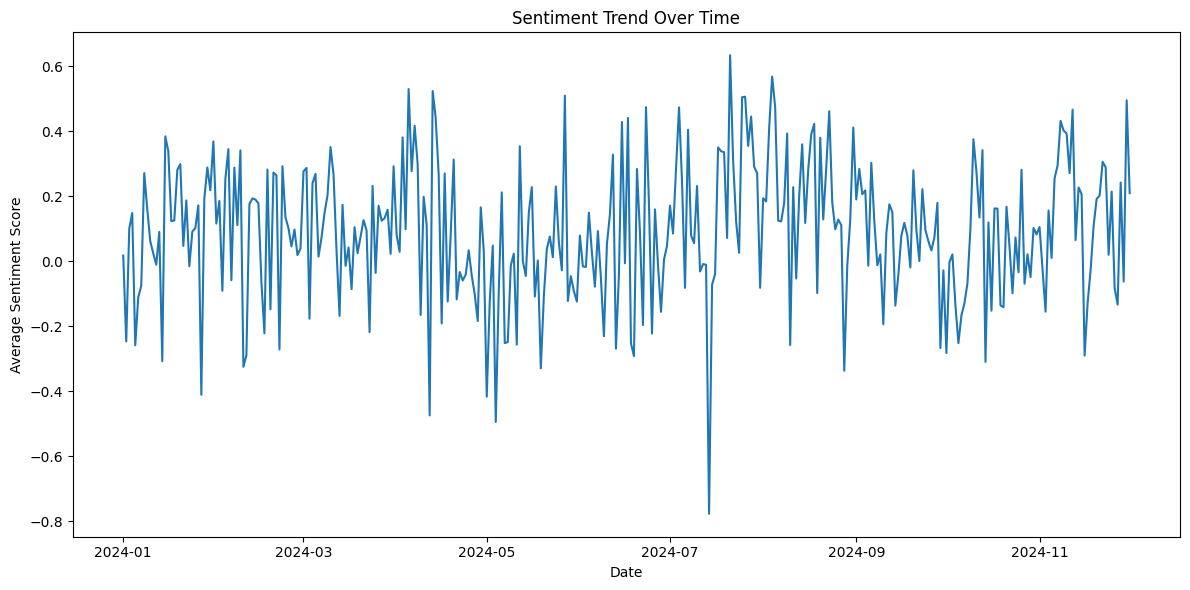

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['Average Sentiment'], label="Average Sentiment")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.tight_layout()
plt.show()

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def calculate_sentiment(keywords):
    if isinstance(keywords, list) and keywords:
        text = " ".join(keywords)
        sentiment = sia.polarity_scores(text)
        return sentiment['compound']
    return None

biden_data = relevant_column[
    relevant_column['Combined_Keywords_spacy_tf'].apply(lambda x: any("biden" in keyword.lower() for keyword in x) if isinstance(x, list) else False)
].copy()

trump_data = relevant_column[
    relevant_column['Combined_Keywords_spacy_tf'].apply(lambda x: any("trump" in keyword.lower() for keyword in x) if isinstance(x, list) else False)
].copy()

kamala_data = relevant_column[
    relevant_column['Combined_Keywords_spacy_tf'].apply(lambda x: any("kamala harris" in keyword.lower() for keyword in x) if isinstance(x, list) else False)
].copy()

biden_data.loc[:, 'spacy_tf_sentiment'] = biden_data['spacy_keywords'].apply(calculate_sentiment)
trump_data.loc[:, 'spacy_tf_sentiment'] = trump_data['spacy_keywords'].apply(calculate_sentiment)
kamala_data.loc[:, 'spacy_tf_sentiment'] = kamala_data['spacy_keywords'].apply(calculate_sentiment)

biden_data.loc[:, 'pub_date'] = pd.to_datetime(biden_data['pub_date'], errors='coerce')
trump_data.loc[:, 'pub_date'] = pd.to_datetime(trump_data['pub_date'], errors='coerce')
kamala_data.loc[:, 'pub_date'] = pd.to_datetime(kamala_data['pub_date'], errors='coerce')


biden_sentiment = biden_data.groupby(biden_data['pub_date'].dt.date)['spacy_tf_sentiment'].mean().reset_index()
biden_sentiment.columns = ['Date', 'Average_Sentiment']

trump_sentiment = trump_data.groupby(trump_data['pub_date'].dt.date)['spacy_tf_sentiment'].mean().reset_index()
trump_sentiment.columns = ['Date', 'Average_Sentiment']

kamla_sentiment = kamala_data.groupby(kamala_data['pub_date'].dt.date)['spacy_tf_sentiment'].mean().reset_index()
kamla_sentiment.columns = ['Date', 'Average_Sentiment']


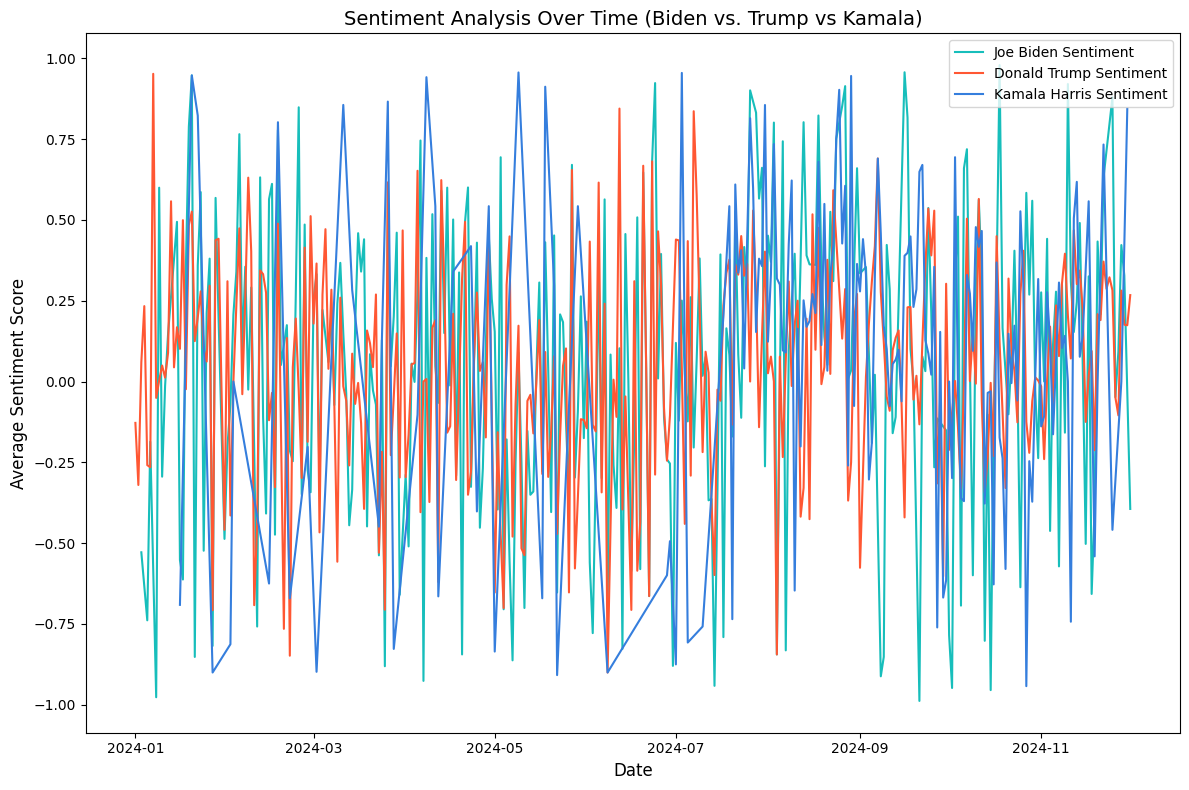

In [ ]:

plt.figure(figsize=(12, 8))

# Plot Biden sentiment
plt.plot(biden_sentiment['Date'], biden_sentiment['Average_Sentiment'], label='Joe Biden Sentiment', color='#17BEBB')

# Plot Trump sentiment
plt.plot(trump_sentiment['Date'], trump_sentiment['Average_Sentiment'], label='Donald Trump Sentiment', color='#FF5733')

plt.plot(kamla_sentiment['Date'], kamla_sentiment['Average_Sentiment'], label='Kamala Harris Sentiment', color='#357EDD')

plt.title('Sentiment Analysis Over Time (Biden vs. Trump vs Kamala)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

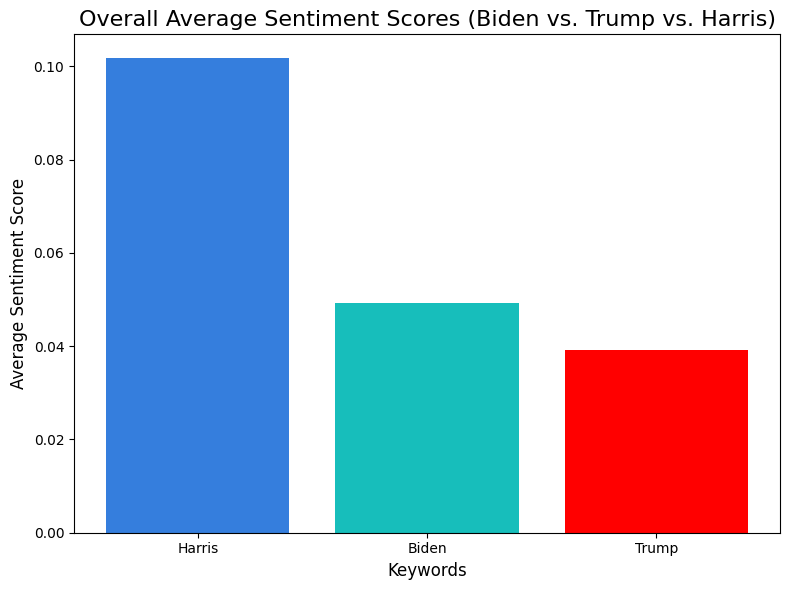

In [ ]:

biden_avg_sentiment = biden_sentiment['Average_Sentiment'].mean()
trump_avg_sentiment = trump_sentiment['Average_Sentiment'].mean()
kamala_avg_sentiment = kamla_sentiment['Average_Sentiment'].mean()


data = {
    'Keyword': ['Biden', 'Trump', 'Harris'],
    'Average_Sentiment': [biden_avg_sentiment, trump_avg_sentiment, kamala_avg_sentiment]
}


sentiment_df = pd.DataFrame(data).sort_values(by='Average_Sentiment', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(sentiment_df['Keyword'], sentiment_df['Average_Sentiment'], color=['#357EDD', '#17BEBB', 'red'])

plt.title('Overall Average Sentiment Scores (Biden vs. Trump vs. Harris)', fontsize=16)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xlabel('Keywords', fontsize=12)


plt.tight_layout()

plt.show()


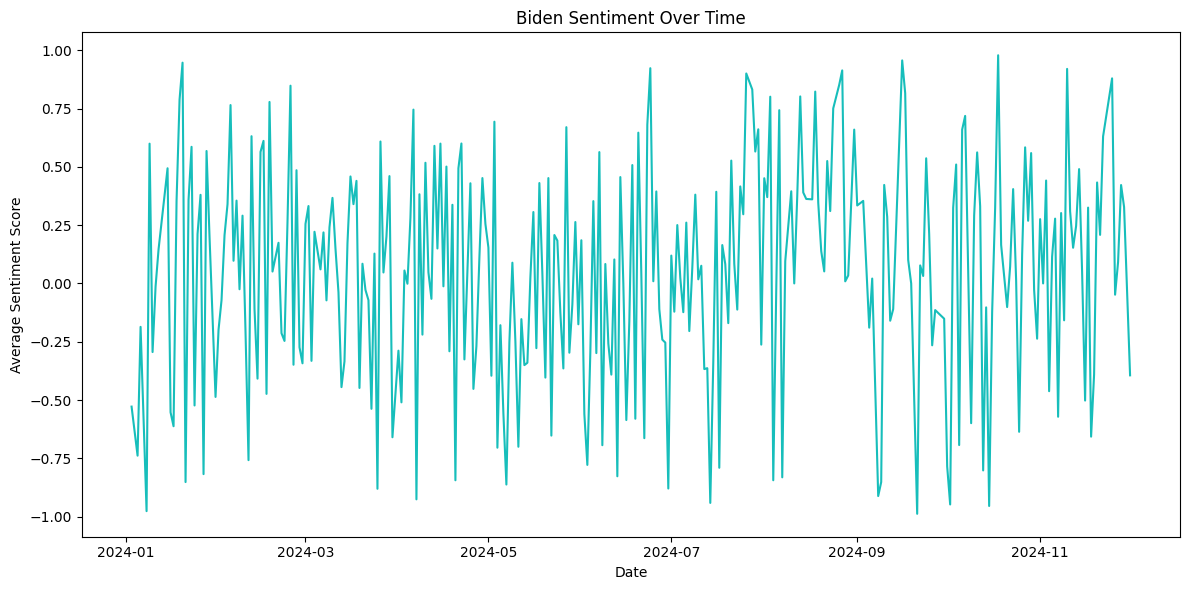

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(biden_sentiment['Date'], biden_sentiment['Average_Sentiment'], label='Biden Sentiment', color='#17BEBB')
plt.title("Biden Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.tight_layout()
plt.show()

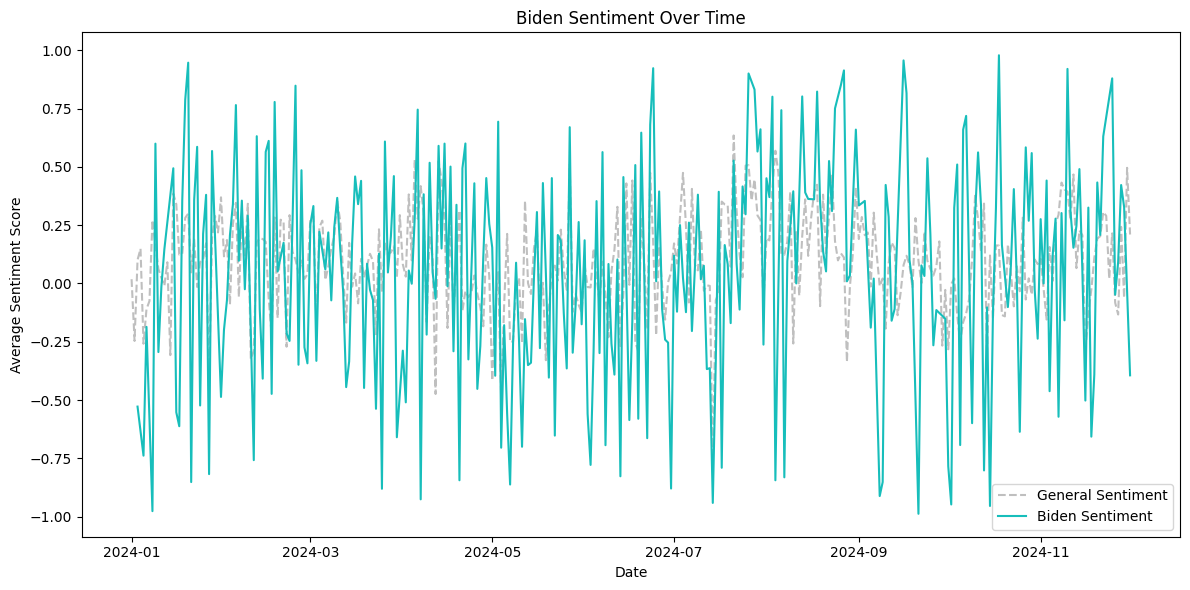

In [ ]:


plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['Average Sentiment'], color="grey", linestyle="--", alpha=0.5, label="General Sentiment")
plt.plot(biden_sentiment['Date'], biden_sentiment['Average_Sentiment'], label='Biden Sentiment', color='#17BEBB')
plt.title("Biden Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.tight_layout()
plt.show()

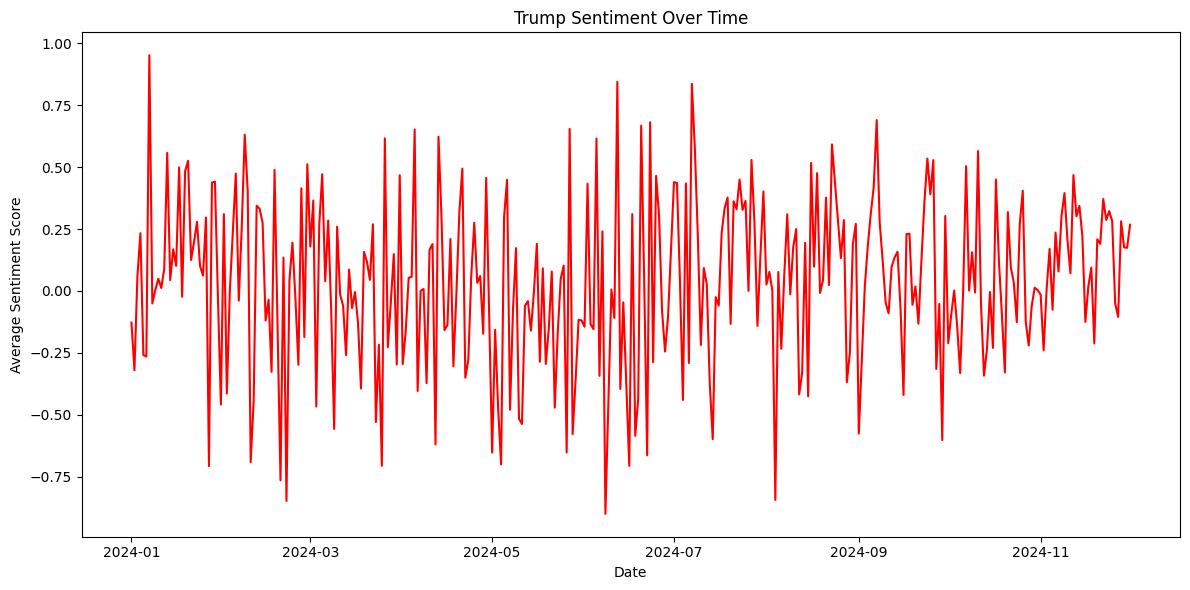

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(trump_sentiment['Date'], trump_sentiment['Average_Sentiment'], label='Trump Sentiment', color='red')
plt.title("Trump Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.tight_layout()
plt.show()

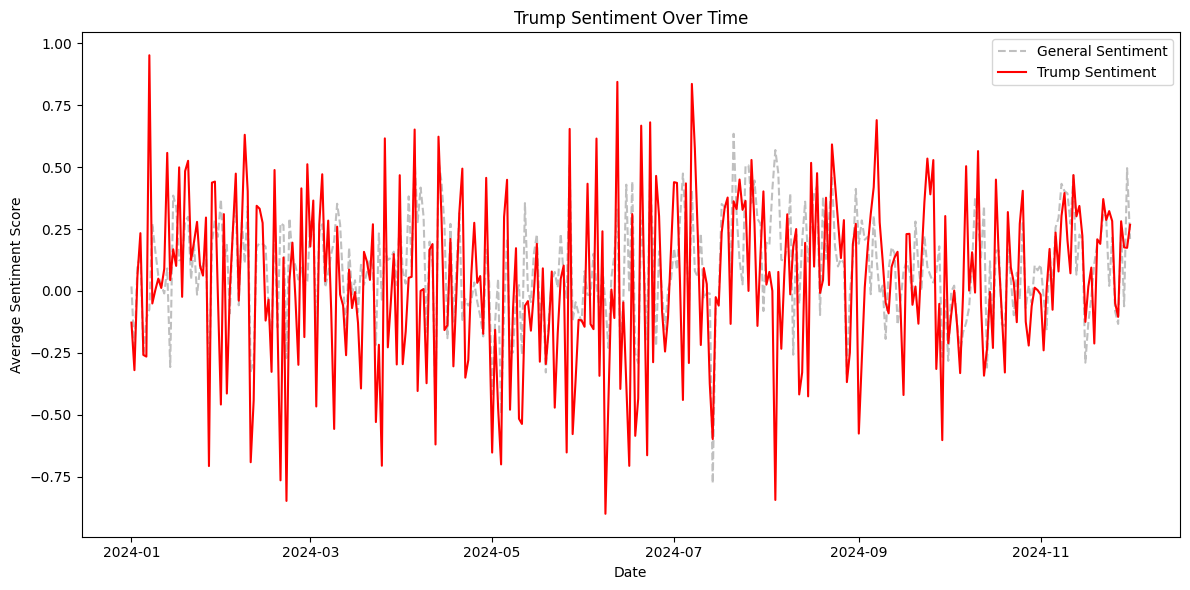

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['Average Sentiment'], color="grey", linestyle="--", alpha=0.5, label="General Sentiment")
plt.plot(trump_sentiment['Date'], trump_sentiment['Average_Sentiment'], label='Trump Sentiment', color='red')
plt.title("Trump Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.tight_layout()
plt.show()

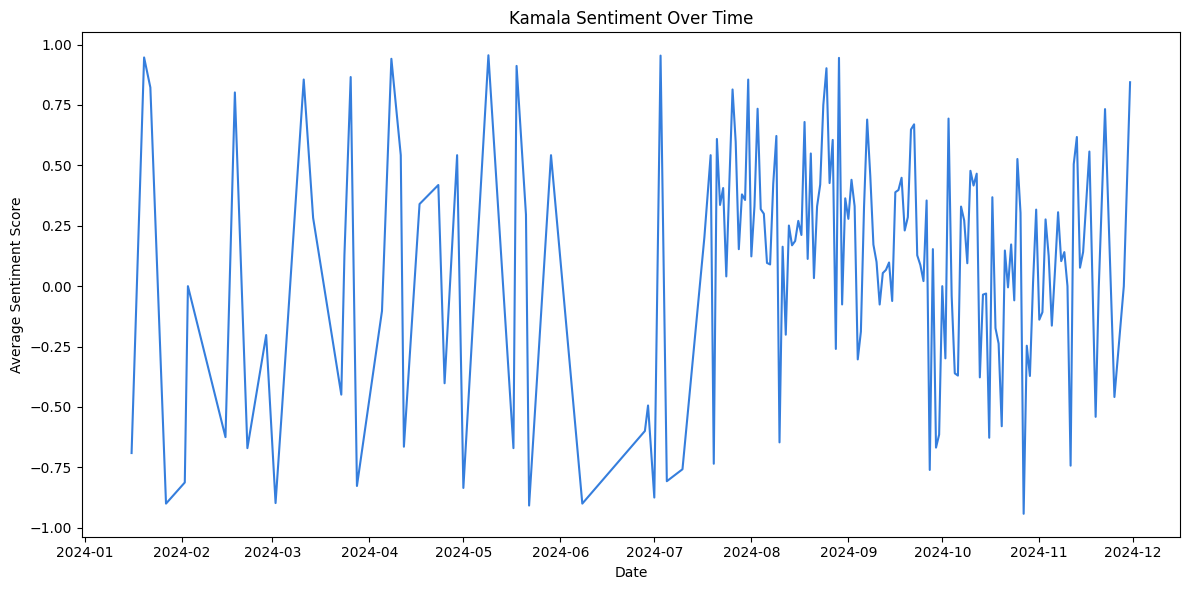

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(kamla_sentiment['Date'], kamla_sentiment['Average_Sentiment'], label='Kamala Sentiment', color='#357EDD')
plt.title("Kamala Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.tight_layout()
plt.show()

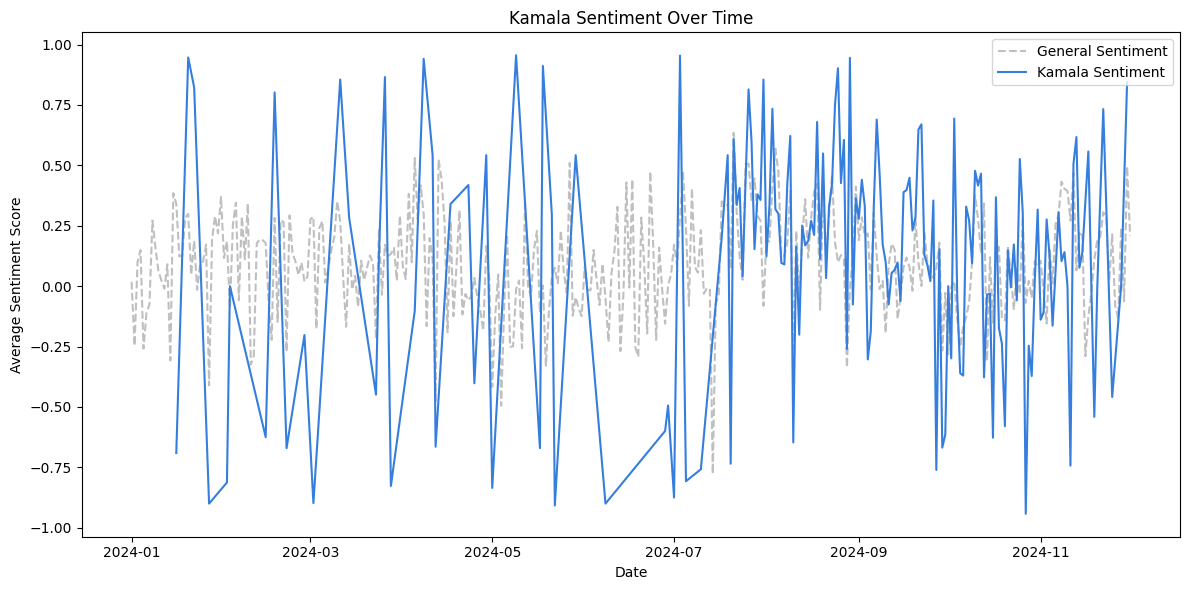

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['Average Sentiment'], color="grey", linestyle="--", alpha=0.5, label="General Sentiment")
plt.plot(kamla_sentiment['Date'], kamla_sentiment['Average_Sentiment'], label='Kamala Sentiment', color='#357EDD')
plt.title("Kamala Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.tight_layout()
plt.show()

Topic Modelling Using LDA

In [49]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('omw-1.4')  # For lemmatizer
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Get NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))

# Define your custom stopwords list
custom_stopwords = set(["say", "make", "take", "go", "come", "get", "give", "like", "do",
    "would", "should", "could", "will", "can", "think", "want",
    "people", "day", "new", "time", "u", "i", "he", "she", "you",
    "what", "others", "they", "that"
])

# Combine NLTK stopwords with the custom stopwords list
stop_words = nltk_stopwords.union(custom_stopwords)

# Define replacement dictionary for specific phrases
replacement_dict = {
    r'\b(donald)\s(trump)\b': 'donald trump',
    r'\b(kamala)\s(harris)\b': 'Kamala Harris',
    r'\b(joe)\s(biden)\b': 'Joe Biden',
    r'\b(democratic)\s(party)\b': 'Democratic Party',
    r'\b(republican)\s(party)\b': 'Republican Party',
    r'\b(vice)\s(president)\b': 'vice president',
    r'\b(president)\b': 'president'
}

# Function to preprocess text with replacements
def preprocess_text(text):
    if pd.isnull(text):  # Check for null values
        return ""

    # Apply specific replacements for phrases
    for pattern, replacement in replacement_dict.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Combine features into a single text field
def combine_features(row):
    combined_text = " ".join([
        str(row['headline']),
        str(row['abstract']),
        str(row['snippet']),
        str(row['lead_paragraph']),
    ])
    return combined_text

# Create the combined feature
relevant_column['combined_text'] = relevant_column.apply(combine_features, axis=1)

# Clean the combined text
relevant_column['cleaned_combined_text'] = relevant_column['combined_text'].apply(preprocess_text)

# Drop intermediate combined_text column if not needed
relevant_column.drop(columns=['combined_text'], inplace=True)

# Display the resulting DataFrame
print(relevant_column[['cleaned_combined_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                               cleaned_combined_text
0  year later remains known chimney doe name face...
1  man convicted transgender woman killing first ...
3  ok class first shoot deer missouri high school...
4  unsealed document shed light epstein misdeed l...
5  liberia move create war crime court decade civ...


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(relevant_column['cleaned_combined_text'])

Chosing the right n_components(Number Of Topics). Evaluating using Coherence score(measure how interpretable each word is in a topic)

In [51]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np

# Prepare data for gensim
tokenized_texts = [text.split() for text in relevant_column['cleaned_combined_text']]
id2word = Dictionary(tokenized_texts)
corpus = [id2word.doc2bow(text) for text in tokenized_texts]

def evaluate_coherence(tokenized_texts, min_topics=5, max_topics=20):
    coherence_scores = {}
    for n_topics in range(min_topics, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(tfidf_matrix)
        topics = [
            [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
            for topic in lda.components_
        ]
        coherence_model = CoherenceModel(
            topics=topics, texts=tokenized_texts, dictionary=id2word, coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores[n_topics] = coherence_score
        print(f"Number of Topics: {n_topics}, Coherence Score: {coherence_score}")
    return coherence_scores

# Evaluate coherence over a range of topics
coherence_results = evaluate_coherence(tokenized_texts)


Number of Topics: 5, Coherence Score: 0.5257366881622418
Number of Topics: 6, Coherence Score: 0.536550852834394
Number of Topics: 7, Coherence Score: 0.5674898962172977
Number of Topics: 8, Coherence Score: 0.5753455669929075
Number of Topics: 9, Coherence Score: 0.6208617318457875
Number of Topics: 10, Coherence Score: 0.6056514699318216
Number of Topics: 11, Coherence Score: 0.5928293960990749
Number of Topics: 12, Coherence Score: 0.5905267203929868
Number of Topics: 13, Coherence Score: 0.5574243219796874
Number of Topics: 14, Coherence Score: 0.5682267220793096
Number of Topics: 15, Coherence Score: 0.5446195170536888
Number of Topics: 16, Coherence Score: 0.5672233292415545
Number of Topics: 17, Coherence Score: 0.601365001685318
Number of Topics: 18, Coherence Score: 0.6094781342562454
Number of Topics: 19, Coherence Score: 0.6088344270260435
Number of Topics: 20, Coherence Score: 0.5457739067533601


Evaluating Perplexity(Measure overfitting of the model)

In [52]:

from sklearn.decomposition import LatentDirichletAllocation

def evaluate_perplexity(tfidf_matrix, vectorizer, min_topics=5, max_topics=20):
    results = {}
    for n_topics in range(min_topics, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(tfidf_matrix)
        perplexity = lda.perplexity(tfidf_matrix)
        results[n_topics] = perplexity
        print(f"Number of Topics: {n_topics}, Perplexity: {perplexity}")
    return results

# Evaluate perplexity over a range of topics
perplexity_results = evaluate_perplexity(tfidf_matrix, vectorizer)

Number of Topics: 5, Perplexity: 1221.836705814741
Number of Topics: 6, Perplexity: 1287.1580385101079
Number of Topics: 7, Perplexity: 1360.7545298111204
Number of Topics: 8, Perplexity: 1413.1919078556998
Number of Topics: 9, Perplexity: 1466.4482210290848
Number of Topics: 10, Perplexity: 1531.3300251568085
Number of Topics: 11, Perplexity: 1590.2776119753296
Number of Topics: 12, Perplexity: 1659.67635906367
Number of Topics: 13, Perplexity: 1717.057787002329
Number of Topics: 14, Perplexity: 1834.3594303231255
Number of Topics: 15, Perplexity: 1883.2275599606442
Number of Topics: 16, Perplexity: 1939.1501921247539
Number of Topics: 17, Perplexity: 2006.5668504208134
Number of Topics: 18, Perplexity: 2105.509882758756
Number of Topics: 19, Perplexity: 2124.878972010823
Number of Topics: 20, Perplexity: 2257.3715711375257


Visualize Coherence Score And Perplexity Score

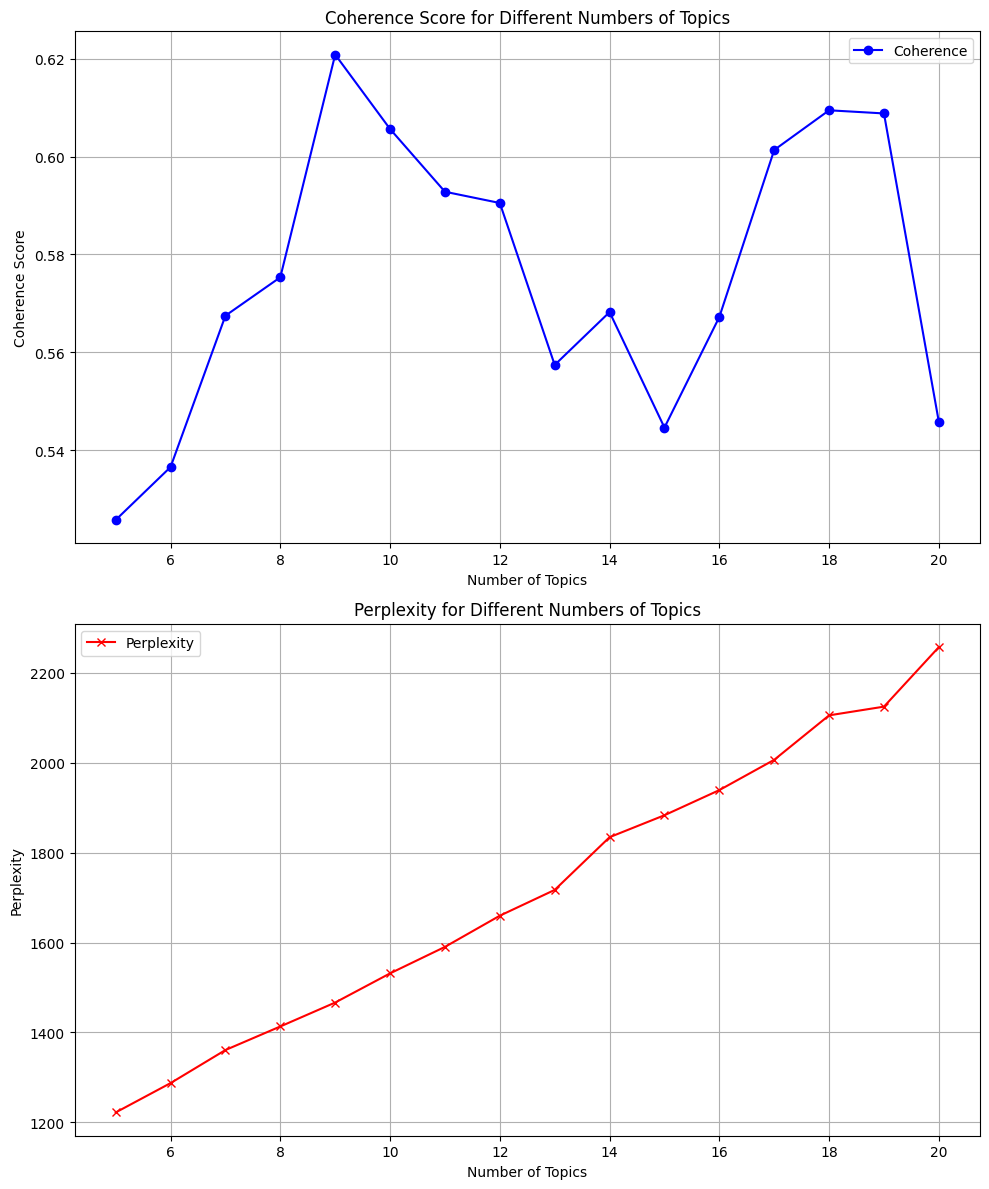

In [53]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot coherence scores
axes[0].plot(list(coherence_results.keys()), list(coherence_results.values()), label='Coherence', color='blue', marker='o')
axes[0].set_title('Coherence Score for Different Numbers of Topics')
axes[0].set_xlabel('Number of Topics')
axes[0].set_ylabel('Coherence Score')
axes[0].grid(True)
axes[0].legend()

# Plot perplexity
axes[1].plot(list(perplexity_results.keys()), list(perplexity_results.values()), label='Perplexity', color='red', marker='x')
axes[1].set_title('Perplexity for Different Numbers of Topics')
axes[1].set_xlabel('Number of Topics')
axes[1].set_ylabel('Perplexity')
axes[1].grid(True)
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#Higher the coherence score better is the classification of topics,as we observe that coherence score is highest at 15 so we chose 15 topics

Interpreting Topics. Optimal number of topics is 9

In [55]:
lda = LatentDirichletAllocation(n_components=9, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(f"Topic {topic_idx + 1}: {top_words}")

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1: result map live election general primary georgia district congressional oregon
Topic 2: trump donald president former trial haley criminal nikki news verdict
Topic 3: republican trump party state vote president former election democrat donald
Topic 4: harris trump kamala president voter donald poll election vice biden
Topic 5: year one american woman country life york first good america
Topic 6: senate republican race democratic democrat state senator vance tim candidate
Topic 7: court supreme justice case judge ruling federal trump law decision
Topic 8: president biden abortion trump israel war ukraine state gaza administration
Topic 9: poll average see polling latest election president trump black harris


Classfying the topics based on their words

In [56]:
import numpy as np
import pandas as pd


# Get topic probabilities for each document
topic_probabilities = lda.transform(tfidf_matrix)

# Get the index of the highest probability topic for each row
topic_indices = np.argmax(topic_probabilities, axis=1)

# Define the topic labels as a dictionary with indices as keys
topic_labels = {
    0: "Campaign Finance and Political Candidates",
    1: "Donald Trump Legal Challenges",
    2: "Republican and Democratic Primaries and Candidates",
    3: "Kamala Harris, Presidential Polls, and Elections",
    4: "American Culture, Society, and Values",
    5: "Senate Races and Political Candidates",
    6: "Supreme Court Cases and Judicial Decisions",
    7: "Abortion and Women's Right",
    8: "Polling Trends and Public Opinions on Politics"
}


# Assign topic indices to the DataFrame
relevant_column['topic_number'] = topic_indices

# Map the topic labels to their respective indices
relevant_column['topic_label'] = relevant_column['topic_number'].map(topic_labels)

# Display the resulting DataFrame with headline, topic_number, and topic_label
print(relevant_column[['headline', 'topic_number', 'topic_label']].head())



                                            headline  topic_number  \
0  35 Years Later, the Remains Known as ‘Chimney ...             4   
1  Man Convicted in Transgender Woman’s Killing i...             1   
3                 OK, Class, First We Shoot the Deer             4   
4  Unsealed Documents Shed Light on Epstein’s Mis...             6   
5  Liberia Moves to Create War Crimes Court, Deca...             4   

                                  topic_label  
0       American Culture, Society, and Values  
1               Donald Trump Legal Challenges  
3       American Culture, Society, and Values  
4  Supreme Court Cases and Judicial Decisions  
5       American Culture, Society, and Values  


Analysis Of Timline

In [67]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(tfidf_matrix)


def get_topic_values(model, feature_names, no_top_words, doc_idx):
    topic_dist = model.transform(tfidf_matrix[doc_idx:doc_idx+1])  # Get topic distribution for the document
    dominant_topic = topic_dist.argmax()  # Get the dominant topic
    top_words = [feature_names[i] for i in model.components_[dominant_topic].argsort()[:-no_top_words - 1:-1]]
    return dominant_topic, " ".join(top_words)

topic_values_list = []
for idx in range(len(relevant_column)):  # Use range to iterate over the DataFrame index
    topic_idx, top_words = get_topic_values(lda, vectorizer.get_feature_names_out(), 10, idx)
    topic_values_list.append(top_words)

# Add the 'topic_values' column to the DataFrame
relevant_column['topic_values'] = topic_values_list


# Group by 'pub_date' and get the most frequent topic for each publication date
trending_topics = relevant_column.groupby('pub_date')['topic_values'].apply(lambda x: x.mode()[0]).reset_index()

topic_trends = relevant_column.groupby(['pub_date', 'topic_values']).size().unstack(fill_value=0)

# Display the trending topics
print("Trending Topics (Most frequent per pub_date):")
print(trending_topics.head())

# Display the count of each topic over time
print("Topic Trends (Count of topics over time):")
print(topic_trends.head())




Trending Topics (Most frequent per pub_date):
                   pub_date                                       topic_values
0 2024-01-01 00:53:23+00:00  trump president election poll donald harris uk...
1 2024-01-01 02:09:45+00:00  year one american country trump good america e...
2 2024-01-01 05:01:27+00:00  year one american country trump good america e...
3 2024-01-01 08:00:15+00:00  year one american country trump good america e...
4 2024-01-01 08:00:30+00:00  court supreme justice federal case law judge s...
Topic Trends (Count of topics over time):
topic_values               court supreme justice federal case law judge state president trump  \
pub_date                                                                                        
2024-01-01 00:53:23+00:00                                                  0                    
2024-01-01 02:09:45+00:00                                                  0                    
2024-01-01 05:01:27+00:00                         

Trending Topics By Date

In [69]:
print(trending_topics.columns)


Index(['pub_date', 'topic_values', 'topic_count'], dtype='object')


In [72]:

relevant_column['pub_date'] = pd.to_datetime(relevant_column['pub_date'])

trending_topics = relevant_column.groupby([relevant_column['pub_date'].dt.to_period('M'), 'topic_label']).size().reset_index(name='topic_count')

# Pivot the table to get a matrix of topics over time
trending_matrix = trending_topics.pivot_table(index='pub_date', columns='topic_label', values='topic_count', fill_value=0)

# Display the trending topics over time
print(trending_matrix)

topic_label  Abortion and Women's Right  \
pub_date                                  
2024-01                           184.0   
2024-02                           183.0   
2024-03                           212.0   
2024-04                           234.0   
2024-05                           670.0   
2024-06                            83.0   
2024-07                            84.0   
2024-08                            65.0   
2024-09                           136.0   
2024-10                           339.0   
2024-11                           508.0   
2024-12                             8.0   

topic_label  American Culture, Society, and Values  \
pub_date                                             
2024-01                                      242.0   
2024-02                                      269.0   
2024-03                                      330.0   
2024-04                                      359.0   
2024-05                                      789.0   
2024-06            

<ipython-input-72-bd46a0c98aa3>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trending_topics = relevant_column.groupby([relevant_column['pub_date'].dt.to_period('M'), 'topic_label']).size().reset_index(name='topic_count')


In [73]:
print(trending_matrix.columns)


Index(['Abortion and Women's Right', 'American Culture, Society, and Values',
       'Campaign Finance and Political Candidates',
       'Donald Trump Legal Challenges',
       'Kamala Harris, Presidential Polls, and Elections',
       'Polling Trends and Public Opinions on Politics',
       'Republican and Democratic Primaries and Candidates',
       'Senate Races and Political Candidates',
       'Supreme Court Cases and Judicial Decisions'],
      dtype='object', name='topic_label')


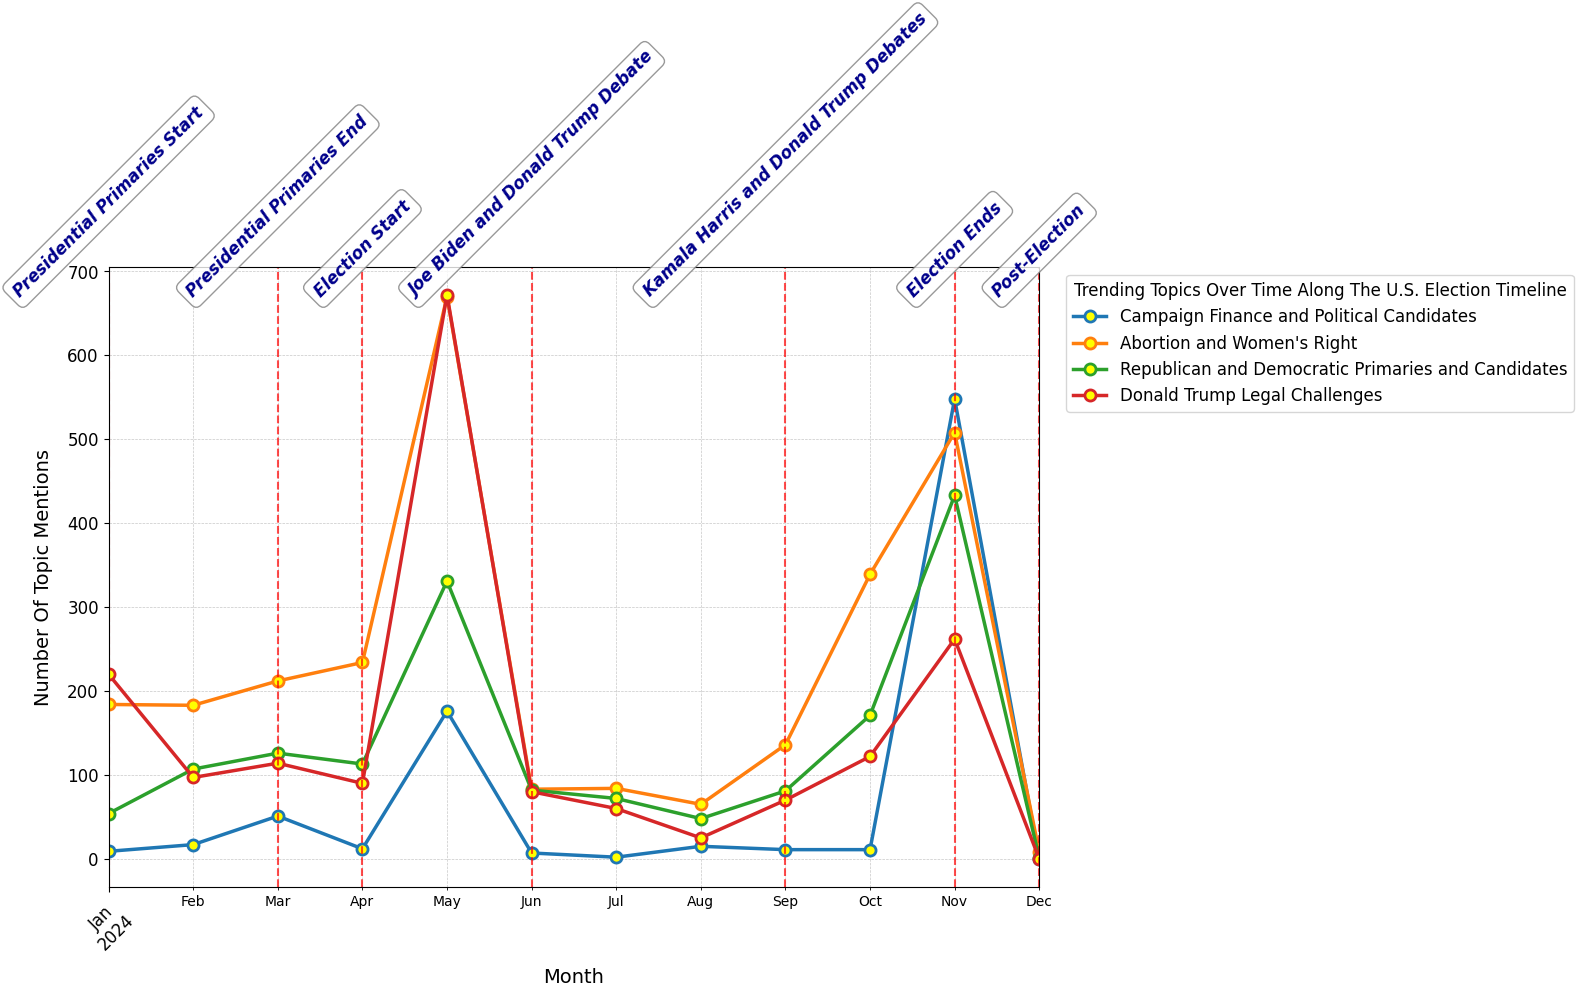

In [75]:
import matplotlib.pyplot as plt

# Define a color palette for the topics
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example: Blue, Orange, Green, Red
markers = ['o', 's', '^', 'D']  # Different markers: circle, square, triangle, diamond

trending_matrix[['Campaign Finance and Political Candidates',
                 "Abortion and Women's Right",
                 'Republican and Democratic Primaries and Candidates',
                 "Donald Trump Legal Challenges"]].plot(kind='line',
                                                        figsize=(16, 10),
                                                        color=color_palette,
                                                        linewidth=2.5,
                                                        markersize=8,  # Set marker size
                                                        marker=markers[0], # Use first marker (circle) for the first topic
                                                        linestyle='-',
                                                        markerfacecolor='yellow', markeredgewidth=2)


plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Number Of Topic Mentions', fontsize=14, labelpad=10)

# Customize x-axis ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add key election dates and labels
election_dates = ['2024-01-15', '2024-03-05', '2024-06-27', '2024-09-10', '2024-04-01', '2024-11-04', '2024-12-04']
election_labels = [
    'Presidential Primaries Start', 'Presidential Primaries End',
    'Joe Biden and Donald Trump Debate', 'Kamala Harris and Donald Trump Debates',
    'Election Start', 'Election Ends', 'Post-Election'
]

for date, label in zip(election_dates, election_labels):
    # Add vertical dashed lines with improved appearance
    plt.axvline(x=date, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

    plt.text(date, plt.ylim()[1] * 0.95, label, rotation=45, color='darkblue',
             fontsize=12, fontweight='bold', style='italic', ha='center',
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4', alpha=0.8))


plt.legend(title='Trending Topics Over Time Along The U.S. Election Timeline',fontsize=12, title_fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True)


plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


plt.tight_layout()


plt.show()


Visualizing Topics Using Word Cloud

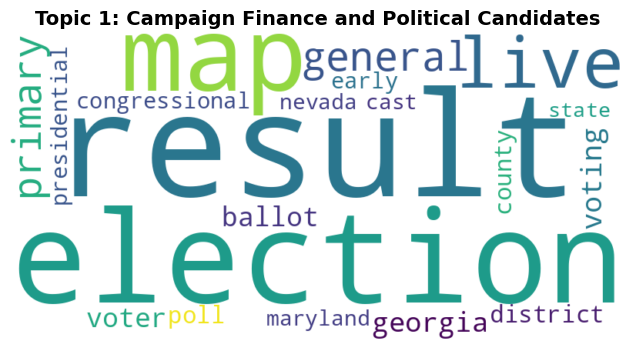

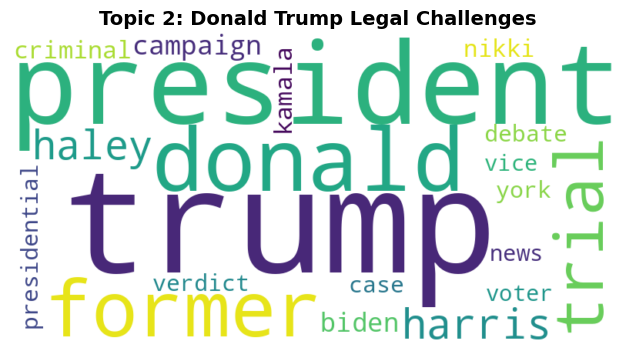

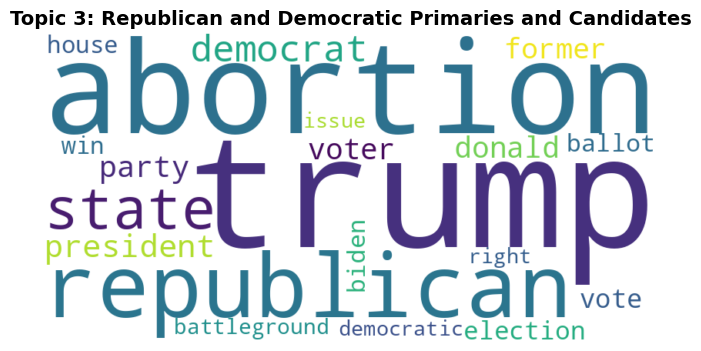

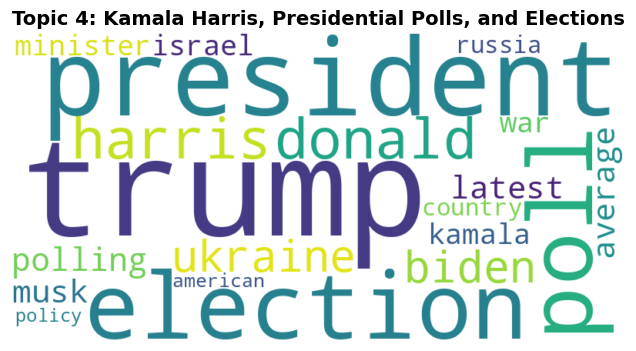

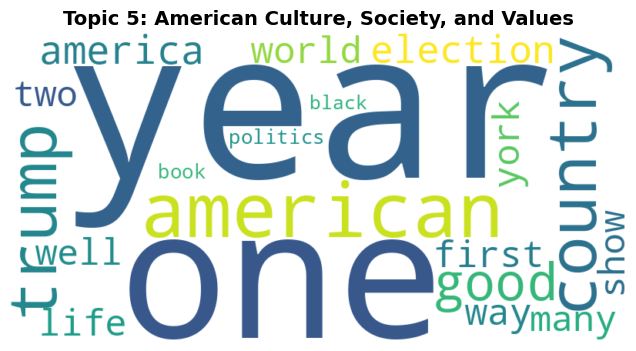

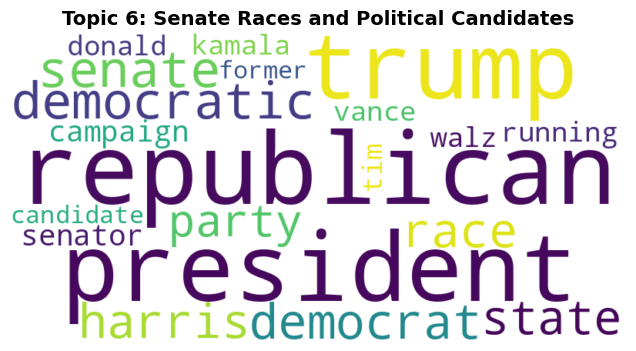

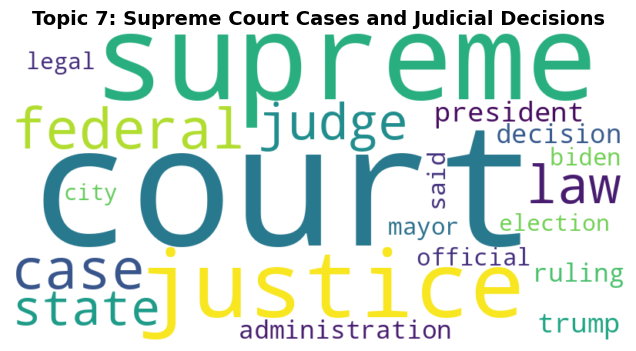

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your topic labels
topic_labels = ["Campaign Finance and Political Candidates","Donald Trump Legal Challenges","Republican and Democratic Primaries and Discussion on Abortion","Kamala Harris, Presidential Polls, and Elections","American Culture, Society, and Values","Senate Races and Political Candidates",
    "Supreme Court Cases and Judicial Decisions",
    "Abortion and Women's Right",
    "Polling Trends and Public Opinions on Politics"
]

def plot_word_clouds_with_labels(lda_model, terms, topic_labels):
    for topic_idx, topic in enumerate(lda_model.components_):
        # Create a dictionary of top words and their weights for the topic
        topic_words = {terms[i]: topic[i] for i in topic.argsort()[:-21:-1]}
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

        # Plot the word cloud
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_idx + 1}: {topic_labels[topic_idx]}", fontsize=14, fontweight='bold')
        plt.show()

# Call the function
plot_word_clouds_with_labels(lda, vectorizer.get_feature_names_out(), topic_labels)
